## Dogs Breed Data Training/Test Preparation

In [8]:
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline

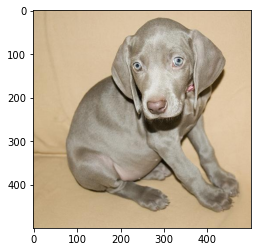

In [9]:
dog_test = cv2.imread('../DogsBreeds/images/images/n02092339-Weimaraner/n02092339_75.jpg')
dog_test = cv2.cvtColor(dog_test,cv2.COLOR_BGR2RGB)
plt.imshow(dog_test)

## Data exploration

In [10]:
classes = os.listdir('../DogsBreeds/images/images/')
print('Dogs breeds:' + str(len(classes)))

Dogs breeds:120


In [11]:
images_by_dog = list()
for i in classes:
    images = os.listdir('../DogsBreeds/images/images/' + i )
    images_by_dog.append(i + ':' + str(len(images)))
images_by_dog[:10]

['n02085620-Chihuahua:152',
 'n02085782-Japanese_spaniel:185',
 'n02085936-Maltese_dog:252',
 'n02086079-Pekinese:149',
 'n02086240-Shih-Tzu:214',
 'n02086646-Blenheim_spaniel:188',
 'n02086910-papillon:196',
 'n02087046-toy_terrier:172',
 'n02087394-Rhodesian_ridgeback:172',
 'n02088094-Afghan_hound:239']

### Create training and test data

In [12]:
def create_train_test_dirs(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        train_dir = directory + 'train'
        test_dir = directory + 'test'

        if not os.path.exists(train_dir):
            os.makedirs(train_dir)

        if not os.path.exists(test_dir):
            os.makedirs(test_dir)
    

In [13]:
directory_train_test = '../DogsBreedsTrainingTestData/'
create_train_test_dirs(directory_train_test)

### Split data

In [14]:
original_dir = '../DogsBreeds/images/images/'
classes = os.listdir(original_dir)

for i_class in tqdm(classes):
    images_by_class = os.listdir(original_dir + i_class)
    x_train,x_test = train_test_split(images_by_class, test_size = 0.2)
    #Copy training images to the train dir
    directory_train_breed = '../DogsBreedsTrainingTestData/train/' + i_class 
    directory_test_breed = '../DogsBreedsTrainingTestData/test/' + i_class 
    
    if not os.path.exists(directory_train_breed):
        os.makedirs(directory_train_breed)
        
    if not os.path.exists(directory_test_breed):
        os.makedirs(directory_test_breed)
    
    directory_train_breed += '/'
    directory_test_breed += '/'
    
    for image_train in x_train:
        img_train_dir = original_dir + i_class + '/' + image_train
        dog_train_img = cv2.imread(img_train_dir)
        cv2.imwrite(directory_train_breed + image_train,dog_train_img)
        
    for image_test in x_test:
        img_test_dir = original_dir + i_class + '/' + image_test 
        dog_test_img = cv2.imread(img_test_dir)
        cv2.imwrite(directory_test_breed + image_test,dog_test_img)

100%|██████████| 120/120 [15:24<00:00,  7.71s/it]
